In [1]:
import pandas as pd
import sys
sys.path.append("../lib")
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from utils import iterate_over
from utils import load_config_and_check
import os

In [2]:
FOLDER_EXECUTIONS = "../data/experiment_v07/cross_platform/executions"

In [3]:
config = load_config_and_check("../config/experiment_v07.yaml")

In [4]:
# scan the folders with executions 
# prepare all the possible pairs of comparisons

# get all the pairs refering to the same program_ID and from two different 
# platforms

# group the pairs per program_ID and yield the group

# so that the detector can analyze all the pairs in the same group and save a 
# single json refering to the same program_ID


In [5]:
def read_execution_folder(folder_with_execs, compiler_name):
    """Parse execution folder: info on the program_id and execution."""
    files = os.listdir(os.path.join(folder_with_execs, compiler_name))
    records = []
    for filename in files:
        new_record = {}
        new_record["compiler_name"] = compiler_name
        new_record["program_id"] = filename.split("_")[0]
        new_record["exec_iteration"] = filename.split("_")[1].replace(".json", "")
        new_record["filename"] = filename
        new_record["filepath"] = os.path.join(folder_with_execs, compiler_name, filename)
        records.append(new_record)
    return records

## Draft code for Multiple Execution Comparisons (move to lib already)

In [4]:
compilers = config["comparisons"][0]["compilers"]
compilers_names = [e['name'] for e in compilers]

In [63]:
all_records = []
for i_compiler in compilers_names:
    i_records = read_folder(
        folder_with_execs=FOLDER_EXECUTIONS, 
        compiler_name=i_compiler)
    all_records.extend(i_records)

df_all = pd.DataFrame.from_records(all_records)

In [68]:
def iterate_over_program_ids(execution_folder, compilers_names):
    """Iterate over all possible program_IDs.
    
    It yields the group with all pairs of executions refering to the same
    program_ID.
    """
    all_records = []
    for i_compiler in compilers_names:
        i_records = read_execution_folder(
            folder_with_execs=execution_folder, 
            compiler_name=i_compiler)
        all_records.extend(i_records)
    
    df_all = pd.DataFrame.from_records(all_records)
    
    df_all_pairs = create_pairs(
        df_all_executions=df_all, 
        compilers_names=compilers_names)
    
    for program_id in sorted(df_all_pairs["program_id"].unique()):
        print(f"program_id: {program_id}")
        # keep only pairs of this program ID
        df_single_program_id = df_all_pairs[
            df_all_pairs["program_id"] == program_id
        ]
        # prepare the pairs of paths to the two execution results 
        # from two different platforms
        pairs_single_program_id = list(zip(
            df_single_program_id["filepath_x"],
            df_single_program_id["filepath_y"]
        ))
        yield program_id, pairs_single_program_id
    

from itertools import combinations

def create_pairs(df_all_executions, compilers_names):
    """Create all comparisons of executions from different platforms."""
    
    # get all possible pairs of platforms
    platforms_pairs = combinations(compilers_names, 2)
    
    df_pairs_all_platforms = [] 
    
    for platfrom_a, platfrom_b in platforms_pairs:
        df_a = df[df["compiler_name"] == platfrom_a]
        df_b = df[df["compiler_name"] == platfrom_b]        
        df_a_b = pd.merge(df_a, df_b, on="program_id")
        df_pairs_all_platforms.append(df_a_b)
        
    df_all_pairs = pd.concat(df_pairs_all_platforms, axis= 1)
    return df_all_pairs
    

def iterate_over_pairs_of_group(pairs):
    """It iterates over the group made of pairs of json.
    
    It yields every time two dictionary representing the exection of the two
    elements in a pair.
    """
    for path_exec_a, path_exec_b in pairs:
        with open(path_exec_a, 'r') as f:
            res_a =  json.load(f)
        with open(path_exec_b, 'r') as f:
            res_b =  json.load(f)
        plat_a = path_exec_a.split("/")[-2]
        plat_b = path_exec_b.split("/")[-2]
        yield plat_a, plat_b, res_a, res_b    
    
    

In [67]:
for program_id, group_same_program_id in iterate_over_program_ids(
    execution_folder=FOLDER_EXECUTIONS, 
    compilers_names=compilers_names):
    print("G: ", group_same_program_id)
    for plat_a, plat_b, res_a, res_b in iterate_over_pairs_of_group(group_same_program_id):
        print("res_a: ", len(res_a))
        print("res_b: ", len(res_b))
        # ran detector
        
    # save detector result for this program_ID
    

program_id: 0
G:  [('../data/experiment_v05/cross_platform/executions/qiskit/0_4.json', '../data/experiment_v05/cross_platform/executions/cirq/0_4.json'), ('../data/experiment_v05/cross_platform/executions/qiskit/0_4.json', '../data/experiment_v05/cross_platform/executions/cirq/0_5.json'), ('../data/experiment_v05/cross_platform/executions/qiskit/0_4.json', '../data/experiment_v05/cross_platform/executions/cirq/0_3.json'), ('../data/experiment_v05/cross_platform/executions/qiskit/0_4.json', '../data/experiment_v05/cross_platform/executions/cirq/0_0.json'), ('../data/experiment_v05/cross_platform/executions/qiskit/0_4.json', '../data/experiment_v05/cross_platform/executions/cirq/0_1.json'), ('../data/experiment_v05/cross_platform/executions/qiskit/0_4.json', '../data/experiment_v05/cross_platform/executions/cirq/0_6.json'), ('../data/experiment_v05/cross_platform/executions/qiskit/0_4.json', '../data/experiment_v05/cross_platform/executions/cirq/0_2.json'), ('../data/experiment_v05/cros

res_a:  690
res_b:  663
res_a:  690
res_b:  675
program_id: 10
G:  [('../data/experiment_v05/cross_platform/executions/qiskit/10_9.json', '../data/experiment_v05/cross_platform/executions/cirq/10_9.json'), ('../data/experiment_v05/cross_platform/executions/qiskit/10_9.json', '../data/experiment_v05/cross_platform/executions/cirq/10_3.json'), ('../data/experiment_v05/cross_platform/executions/qiskit/10_9.json', '../data/experiment_v05/cross_platform/executions/cirq/10_2.json'), ('../data/experiment_v05/cross_platform/executions/qiskit/10_9.json', '../data/experiment_v05/cross_platform/executions/cirq/10_6.json'), ('../data/experiment_v05/cross_platform/executions/qiskit/10_9.json', '../data/experiment_v05/cross_platform/executions/cirq/10_1.json'), ('../data/experiment_v05/cross_platform/executions/qiskit/10_9.json', '../data/experiment_v05/cross_platform/executions/cirq/10_0.json'), ('../data/experiment_v05/cross_platform/executions/qiskit/10_9.json', '../data/experiment_v05/cross_plat

res_a:  4157
res_b:  4174
res_a:  4157
res_b:  4200
res_a:  4157
res_b:  4215
res_a:  4157
res_b:  4203
res_a:  4157
res_b:  4173
res_a:  4157
res_b:  4188
res_a:  4157
res_b:  4225
res_a:  4164
res_b:  4230
res_a:  4164
res_b:  4217
res_a:  4164
res_b:  4172
res_a:  4164
res_b:  4174
res_a:  4164
res_b:  4200
res_a:  4164
res_b:  4215
res_a:  4164
res_b:  4203
res_a:  4164
res_b:  4173
res_a:  4164
res_b:  4188
res_a:  4164
res_b:  4225
res_a:  4150
res_b:  4230
res_a:  4150
res_b:  4217
res_a:  4150
res_b:  4172
res_a:  4150
res_b:  4174
res_a:  4150
res_b:  4200
res_a:  4150
res_b:  4215
res_a:  4150
res_b:  4203
res_a:  4150
res_b:  4173
res_a:  4150
res_b:  4188
res_a:  4150
res_b:  4225
res_a:  4137
res_b:  4230
res_a:  4137
res_b:  4217
res_a:  4137
res_b:  4172
res_a:  4137
res_b:  4174
res_a:  4137
res_b:  4200
res_a:  4137
res_b:  4215
res_a:  4137
res_b:  4203
res_a:  4137
res_b:  4173
res_a:  4137
res_b:  4188
res_a:  4137
res_b:  4225
res_a:  4227
res_b:  4230
res_a:  4227

res_a:  368
res_b:  365
res_a:  368
res_b:  372
res_a:  368
res_b:  368
res_a:  368
res_b:  374
res_a:  368
res_b:  369
res_a:  368
res_b:  372
res_a:  368
res_b:  370
res_a:  368
res_b:  365
res_a:  368
res_b:  362
res_a:  368
res_b:  361
res_a:  368
res_b:  365
res_a:  376
res_b:  372
res_a:  376
res_b:  368
res_a:  376
res_b:  374
res_a:  376
res_b:  369
res_a:  376
res_b:  372
res_a:  376
res_b:  370
res_a:  376
res_b:  365
res_a:  376
res_b:  362
res_a:  376
res_b:  361
res_a:  376
res_b:  365
res_a:  373
res_b:  372
res_a:  373
res_b:  368
res_a:  373
res_b:  374
res_a:  373
res_b:  369
res_a:  373
res_b:  372
res_a:  373
res_b:  370
res_a:  373
res_b:  365
res_a:  373
res_b:  362
res_a:  373
res_b:  361
res_a:  373
res_b:  365
program_id: 3
G:  [('../data/experiment_v05/cross_platform/executions/qiskit/3_8.json', '../data/experiment_v05/cross_platform/executions/cirq/3_8.json'), ('../data/experiment_v05/cross_platform/executions/qiskit/3_8.json', '../data/experiment_v05/cross_pl

res_a:  81
res_b:  86
res_a:  81
res_b:  83
res_a:  81
res_b:  86
res_a:  86
res_b:  87
res_a:  86
res_b:  79
res_a:  86
res_b:  95
res_a:  86
res_b:  83
res_a:  86
res_b:  78
res_a:  86
res_b:  76
res_a:  86
res_b:  77
res_a:  86
res_b:  86
res_a:  86
res_b:  83
res_a:  86
res_b:  86
res_a:  87
res_b:  87
res_a:  87
res_b:  79
res_a:  87
res_b:  95
res_a:  87
res_b:  83
res_a:  87
res_b:  78
res_a:  87
res_b:  76
res_a:  87
res_b:  77
res_a:  87
res_b:  86
res_a:  87
res_b:  83
res_a:  87
res_b:  86
res_a:  81
res_b:  87
res_a:  81
res_b:  79
res_a:  81
res_b:  95
res_a:  81
res_b:  83
res_a:  81
res_b:  78
res_a:  81
res_b:  76
res_a:  81
res_b:  77
res_a:  81
res_b:  86
res_a:  81
res_b:  83
res_a:  81
res_b:  86
program_id: 6
G:  [('../data/experiment_v05/cross_platform/executions/qiskit/6_8.json', '../data/experiment_v05/cross_platform/executions/cirq/6_8.json'), ('../data/experiment_v05/cross_platform/executions/qiskit/6_8.json', '../data/experiment_v05/cross_platform/executions/

res_a:  7388
res_b:  7404
res_a:  7388
res_b:  7386
res_a:  7388
res_b:  7363
res_a:  7388
res_b:  7425
res_a:  7388
res_b:  7367
res_a:  7432
res_b:  7403
res_a:  7432
res_b:  7403
res_a:  7432
res_b:  7370
res_a:  7432
res_b:  7386
res_a:  7432
res_b:  7378
res_a:  7432
res_b:  7404
res_a:  7432
res_b:  7386
res_a:  7432
res_b:  7363
res_a:  7432
res_b:  7425
res_a:  7432
res_b:  7367
res_a:  7417
res_b:  7403
res_a:  7417
res_b:  7403
res_a:  7417
res_b:  7370
res_a:  7417
res_b:  7386
res_a:  7417
res_b:  7378
res_a:  7417
res_b:  7404
res_a:  7417
res_b:  7386
res_a:  7417
res_b:  7363
res_a:  7417
res_b:  7425
res_a:  7417
res_b:  7367
res_a:  7337
res_b:  7403
res_a:  7337
res_b:  7403
res_a:  7337
res_b:  7370
res_a:  7337
res_b:  7386
res_a:  7337
res_b:  7378
res_a:  7337
res_b:  7404
res_a:  7337
res_b:  7386
res_a:  7337
res_b:  7363
res_a:  7337
res_b:  7425
res_a:  7337
res_b:  7367
res_a:  7416
res_b:  7403
res_a:  7416
res_b:  7403
res_a:  7416
res_b:  7370
res_a:  7416

In [25]:
df_all.tail()

,compiler_name,program_id,exec_iteration,filename,filepath
235,cirq,11,7,11_7.json,../data/experiment_v05/cross_platform/executio...
236,cirq,3,6,3_6.json,../data/experiment_v05/cross_platform/executio...
237,cirq,8,7,8_7.json,../data/experiment_v05/cross_platform/executio...
238,cirq,1,4,1_4.json,../data/experiment_v05/cross_platform/executio...
239,cirq,11,8,11_8.json,../data/experiment_v05/cross_platform/executio...


In [31]:
from itertools import combinations

def iterate_over_pairs(df, compilers_names):
    # get all possible pairs of platforms
    platforms_pairs = combinations(compilers_names, 2)
    
    for platfrom_a, platfrom_b in platforms_pairs:
        df_a = df[df["compiler_name"] == platfrom_a]
        df_b = df[df["compiler_name"] == platfrom_b]        
        df = pd.merge(df_a, df_b, on="program_id")
    
    
    

In [34]:
df_res = iterate_over_pairs(df=df_all, compilers_names=compilers_names)
df_res.head()

,compiler_name_x,program_id,exec_iteration_x,filename_x,filepath_x,compiler_name_y,exec_iteration_y,filename_y,filepath_y
0,qiskit,1,6,1_6.json,../data/experiment_v05/cross_platform/executio...,cirq,6,1_6.json,../data/experiment_v05/cross_platform/executio...
1,qiskit,1,6,1_6.json,../data/experiment_v05/cross_platform/executio...,cirq,7,1_7.json,../data/experiment_v05/cross_platform/executio...
2,qiskit,1,6,1_6.json,../data/experiment_v05/cross_platform/executio...,cirq,8,1_8.json,../data/experiment_v05/cross_platform/executio...
3,qiskit,1,6,1_6.json,../data/experiment_v05/cross_platform/executio...,cirq,3,1_3.json,../data/experiment_v05/cross_platform/executio...
4,qiskit,1,6,1_6.json,../data/experiment_v05/cross_platform/executio...,cirq,9,1_9.json,../data/experiment_v05/cross_platform/executio...


In [35]:
df_res.sort_values(by=["program_id", "exec_iteration_x", "exec_iteration_y"]).head()

,compiler_name_x,program_id,exec_iteration_x,filename_x,filepath_x,compiler_name_y,exec_iteration_y,filename_y,filepath_y
333,qiskit,0,0,0_0.json,../data/experiment_v05/cross_platform/executio...,cirq,0,0_0.json,../data/experiment_v05/cross_platform/executio...
334,qiskit,0,0,0_0.json,../data/experiment_v05/cross_platform/executio...,cirq,1,0_1.json,../data/experiment_v05/cross_platform/executio...
336,qiskit,0,0,0_0.json,../data/experiment_v05/cross_platform/executio...,cirq,2,0_2.json,../data/experiment_v05/cross_platform/executio...
332,qiskit,0,0,0_0.json,../data/experiment_v05/cross_platform/executio...,cirq,3,0_3.json,../data/experiment_v05/cross_platform/executio...
330,qiskit,0,0,0_0.json,../data/experiment_v05/cross_platform/executio...,cirq,4,0_4.json,../data/experiment_v05/cross_platform/executio...


In [40]:
df_res

,compiler_name_x,program_id,exec_iteration_x,filename_x,filepath_x,compiler_name_y,exec_iteration_y,filename_y,filepath_y
0,qiskit,1,6,1_6.json,../data/experiment_v05/cross_platform/executio...,cirq,6,1_6.json,../data/experiment_v05/cross_platform/executio...
1,qiskit,1,6,1_6.json,../data/experiment_v05/cross_platform/executio...,cirq,7,1_7.json,../data/experiment_v05/cross_platform/executio...
2,qiskit,1,6,1_6.json,../data/experiment_v05/cross_platform/executio...,cirq,8,1_8.json,../data/experiment_v05/cross_platform/executio...
3,qiskit,1,6,1_6.json,../data/experiment_v05/cross_platform/executio...,cirq,3,1_3.json,../data/experiment_v05/cross_platform/executio...
4,qiskit,1,6,1_6.json,../data/experiment_v05/cross_platform/executio...,cirq,9,1_9.json,../data/experiment_v05/cross_platform/executio...
...,...,...,...,...,...,...,...,...,...
1195,qiskit,6,4,6_4.json,../data/experiment_v05/cross_platform/executio...,cirq,9,6_9.json,../data/experiment_v05/cross_platform/executio...
1196,qiskit,6,4,6_4.json,../data/experiment_v05/cross_platform/executio...,cirq,5,6_5.json,../data/experiment_v05/cross_platform/executio...
1197,qiskit,6,4,6_4.json,../data/experiment_v05/cross_platform/executio...,cirq,0,6_0.json,../data/experiment_v05/cross_platform/executio...
1198,qiskit,6,4,6_4.json,../data/experiment_v05/cross_platform/executio...,cirq,1,6_1.json,../data/experiment_v05/cross_platform/executio...


In [49]:
df_res[
    (df_res["program_id"] == "1") &
    (df_res["exec_iteration_x"] == "6") &
    (df_res["exec_iteration_y"] == "7")
]

,compiler_name_x,program_id,exec_iteration_x,filename_x,filepath_x,compiler_name_y,exec_iteration_y,filename_y,filepath_y
1,qiskit,1,6,1_6.json,../data/experiment_v05/cross_platform/executio...,cirq,7,1_7.json,../data/experiment_v05/cross_platform/executio...


## Read the KS results on multiple executions

In [6]:
FOLDER_DETECTOR = "../data/experiment_v07/cross_platform/predictions/ks"

all_records = []

for filename, detector_res in iterate_over(FOLDER_DETECTOR, filetype=".json", parse_json=True):
    print(f"Reading: {filename}")
    # remove the comparison
    pairs = detector_res.pop('comparisons', None)
        
    for pair in pairs:
        new_record = {**pair, **detector_res}
        all_records.append(new_record)
        
df_detector_results = pd.DataFrame.from_records(all_records)

Reading: 2313
Reading: 1235
Reading: 715
Reading: 115
Reading: 4272
Reading: 101
Reading: 1690
Reading: 2701
Reading: 516
Reading: 4738
Reading: 1792
Reading: 2011
Reading: 4824
Reading: 2773
Reading: 4687
Reading: 4510
Reading: 1244
Reading: 4128
Reading: 2541
Reading: 3962
Reading: 3225
Reading: 3818
Reading: 652
Reading: 4070
Reading: 3363
Reading: 376
Reading: 4329
Reading: 2087
Reading: 795
Reading: 343
Reading: 3090
Reading: 769
Reading: 3800
Reading: 2622
Reading: 2201
Reading: 2047
Reading: 2959
Reading: 480
Reading: 1452
Reading: 3470
Reading: 3494
Reading: 2247
Reading: 3277
Reading: 1050
Reading: 1974
Reading: 925
Reading: 1944
Reading: 560
Reading: 2725
Reading: 1741
Reading: 4040
Reading: 1923
Reading: 2788
Reading: 3319
Reading: 4650
Reading: 4440
Reading: 3883
Reading: 136
Reading: 1804
Reading: 1199
Reading: 1188
Reading: 4825
Reading: 3692
Reading: 4184
Reading: 3890
Reading: 1757
Reading: 4114
Reading: 4770
Reading: 1007
Reading: 2057
Reading: 1769
Reading: 1114
Readi

Reading: 4295
Reading: 3592
Reading: 246
Reading: 3646
Reading: 4547
Reading: 1580
Reading: 4231
Reading: 1650
Reading: 527
Reading: 1113
Reading: 3729
Reading: 2012
Reading: 2680
Reading: 4454
Reading: 1378
Reading: 1017
Reading: 4436
Reading: 2636
Reading: 4469
Reading: 3640
Reading: 2894
Reading: 3375
Reading: 30
Reading: 4428
Reading: 571
Reading: 2351
Reading: 3957
Reading: 1161
Reading: 4635
Reading: 2763
Reading: 3876
Reading: 1269
Reading: 1758
Reading: 4430
Reading: 614
Reading: 2583
Reading: 3348
Reading: 3875
Reading: 2604
Reading: 1169
Reading: 174
Reading: 3094
Reading: 4751
Reading: 3482
Reading: 4689
Reading: 4932
Reading: 4860
Reading: 599
Reading: 3422
Reading: 2508
Reading: 2302
Reading: 4156
Reading: 3420
Reading: 3231
Reading: 1911
Reading: 2485
Reading: 4561
Reading: 1986
Reading: 4051
Reading: 4030
Reading: 2871
Reading: 1524
Reading: 3485
Reading: 2591
Reading: 2262
Reading: 4424
Reading: 450
Reading: 909
Reading: 3059
Reading: 705
Reading: 4108
Reading: 1810
Rea

Reading: 4425
Reading: 763
Reading: 2320
Reading: 3207
Reading: 4794
Reading: 256
Reading: 4182
Reading: 67
Reading: 4855
Reading: 964
Reading: 803
Reading: 1086
Reading: 1403
Reading: 1178
Reading: 2478
Reading: 4350
Reading: 4953
Reading: 2352
Reading: 293
Reading: 1466
Reading: 1762
Reading: 4464
Reading: 3506
Reading: 3869
Reading: 2557
Reading: 2717
Reading: 4286
Reading: 682
Reading: 2051
Reading: 1006
Reading: 1744
Reading: 3496
Reading: 2082
Reading: 1562
Reading: 4833
Reading: 1041
Reading: 4002
Reading: 1617
Reading: 991
Reading: 3748
Reading: 3921
Reading: 3054
Reading: 37
Reading: 1545
Reading: 3783
Reading: 3227
Reading: 3715
Reading: 4958
Reading: 4090
Reading: 4566
Reading: 3359
Reading: 4505
Reading: 1978
Reading: 413
Reading: 3684
Reading: 436
Reading: 1136
Reading: 3234
Reading: 1328
Reading: 1594
Reading: 4607
Reading: 1514
Reading: 4366
Reading: 2518
Reading: 361
Reading: 853
Reading: 156
Reading: 4085
Reading: 530
Reading: 1996
Reading: 2459
Reading: 1890
Reading: 

Reading: 4191
Reading: 907
Reading: 392
Reading: 3991
Reading: 3929
Reading: 2079
Reading: 4896
Reading: 183
Reading: 4131
Reading: 4835
Reading: 1575
Reading: 4993
Reading: 3256
Reading: 537
Reading: 637
Reading: 62
Reading: 1225
Reading: 3096
Reading: 3058
Reading: 1209
Reading: 1655
Reading: 36
Reading: 3960
Reading: 4867
Reading: 4457
Reading: 2704
Reading: 3913
Reading: 134
Reading: 200
Reading: 1075
Reading: 3645
Reading: 2533
Reading: 1657
Reading: 1863
Reading: 1652
Reading: 3116
Reading: 128
Reading: 472
Reading: 1560
Reading: 3499
Reading: 623
Reading: 3122
Reading: 3536
Reading: 3368
Reading: 126
Reading: 149
Reading: 4061
Reading: 695
Reading: 1275
Reading: 3503
Reading: 1411
Reading: 1799
Reading: 3230
Reading: 1842
Reading: 2105
Reading: 1946
Reading: 2193
Reading: 4965
Reading: 4648
Reading: 4544
Reading: 2214
Reading: 3785
Reading: 3706
Reading: 1788
Reading: 3154
Reading: 1697
Reading: 3182
Reading: 1777
Reading: 1264
Reading: 1270
Reading: 3212
Reading: 4121
Reading: 

Reading: 1673
Reading: 2885
Reading: 4470
Reading: 4346
Reading: 4008
Reading: 4636
Reading: 979
Reading: 3269
Reading: 444
Reading: 4019
Reading: 2933
Reading: 2195
Reading: 2196
Reading: 4409
Reading: 4249
Reading: 3339
Reading: 2512
Reading: 1383
Reading: 4169
Reading: 3297
Reading: 4084
Reading: 1926
Reading: 2926
Reading: 517
Reading: 4625
Reading: 1649
Reading: 3034
Reading: 2451
Reading: 3911
Reading: 4708
Reading: 662
Reading: 3289
Reading: 877
Reading: 2194
Reading: 3667
Reading: 1908
Reading: 3964
Reading: 4957
Reading: 1312
Reading: 2395
Reading: 4356
Reading: 2994
Reading: 3736
Reading: 641
Reading: 3723
Reading: 2938
Reading: 2134
Reading: 1739
Reading: 3412
Reading: 4406
Reading: 4969
Reading: 3917
Reading: 188
Reading: 304
Reading: 1598
Reading: 679
Reading: 3391
Reading: 4638
Reading: 179
Reading: 214
Reading: 2543
Reading: 4479
Reading: 3873
Reading: 1968
Reading: 581
Reading: 4621
Reading: 294
Reading: 1668
Reading: 3332
Reading: 318
Reading: 40
Reading: 598
Reading: 

Reading: 1142
Reading: 4278
Reading: 68
Reading: 1600
Reading: 3235
Reading: 3731
Reading: 3179
Reading: 3575
Reading: 3508
Reading: 1066
Reading: 2021
Reading: 644
Reading: 4839
Reading: 4379
Reading: 4175
Reading: 1646
Reading: 2748
Reading: 2300
Reading: 3463
Reading: 3938
Reading: 761
Reading: 4183
Reading: 4963
Reading: 3976
Reading: 393
Reading: 106
Reading: 504
Reading: 640
Reading: 4699
Reading: 4983
Reading: 2513
Reading: 694
Reading: 1850
Reading: 1298
Reading: 4988
Reading: 3862
Reading: 113
Reading: 4427
Reading: 4178
Reading: 3844
Reading: 4546
Reading: 1637
Reading: 3026
Reading: 978
Reading: 1423
Reading: 3859
Reading: 3331
Reading: 3712
Reading: 1262
Reading: 1203
Reading: 1612
Reading: 4521
Reading: 1496
Reading: 2236
Reading: 262
Reading: 3867
Reading: 1507
Reading: 3992
Reading: 3988
Reading: 1624
Reading: 1051
Reading: 3344
Reading: 4306
Reading: 215
Reading: 3418
Reading: 564
Reading: 4313
Reading: 4242
Reading: 1865
Reading: 4994
Reading: 3147
Reading: 1126
Readin

Reading: 2733
Reading: 416
Reading: 1919
Reading: 4700
Reading: 835
Reading: 3078
Reading: 142
Reading: 2879
Reading: 2182
Reading: 2234
Reading: 3035
Reading: 940
Reading: 1115
Reading: 1959
Reading: 2868
Reading: 2964
Reading: 351
Reading: 2219
Reading: 4531
Reading: 2006
Reading: 2031
Reading: 4106
Reading: 1941
Reading: 1177
Reading: 3186
Reading: 1062
Reading: 3968
Reading: 2534
Reading: 923
Reading: 486
Reading: 4426
Reading: 4149
Reading: 488
Reading: 933
Reading: 1156
Reading: 1029
Reading: 3057
Reading: 2429
Reading: 2808
Reading: 4354
Reading: 2204
Reading: 902
Reading: 2184
Reading: 4342
Reading: 4243
Reading: 161
Reading: 2802
Reading: 3336
Reading: 3539
Reading: 2499
Reading: 4745
Reading: 3694
Reading: 3780
Reading: 2693
Reading: 1332
Reading: 2275
Reading: 3141
Reading: 23
Reading: 1564
Reading: 4779
Reading: 2358
Reading: 3222
Reading: 2872
Reading: 4049
Reading: 349
Reading: 4567
Reading: 3125
Reading: 1819
Reading: 2549
Reading: 4948
Reading: 726
Reading: 2189
Reading

Reading: 216
Reading: 1069
Reading: 4092
Reading: 4912
Reading: 558
Reading: 147
Reading: 74
Reading: 4613
Reading: 1214
Reading: 3861
Reading: 77
Reading: 2734
Reading: 1915
Reading: 4627
Reading: 14
Reading: 2393
Reading: 4055
Reading: 2198
Reading: 2665
Reading: 2053
Reading: 2923
Reading: 4937
Reading: 381
Reading: 1809
Reading: 3402
Reading: 2947
Reading: 883
Reading: 1444
Reading: 871
Reading: 3244
Reading: 2836
Reading: 1192
Reading: 1217
Reading: 2855
Reading: 1150
Reading: 1295
Reading: 1985
Reading: 832
Reading: 2896
Reading: 3381
Reading: 4757
Reading: 823
Reading: 3005
Reading: 2470
Reading: 3698
Reading: 2107
Reading: 4995
Reading: 3983
Reading: 3801
Reading: 994
Reading: 1129
Reading: 4410
Reading: 3119
Reading: 1056
Reading: 565
Reading: 2056
Reading: 3746
Reading: 828
Reading: 331
Reading: 3997
Reading: 4103
Reading: 4859
Reading: 2943
Reading: 3371
Reading: 4210
Reading: 3567
Reading: 1475
Reading: 841
Reading: 2431
Reading: 320
Reading: 4655
Reading: 1303
Reading: 263

Reading: 2092
Reading: 3978
Reading: 4005
Reading: 3933
Reading: 4181
Reading: 2776
Reading: 4050
Reading: 4664
Reading: 95
Reading: 1807
Reading: 4852
Reading: 553
Reading: 3625
Reading: 4599
Reading: 1306
Reading: 3448
Reading: 1068
Reading: 3615
Reading: 2367
Reading: 3776
Reading: 1187
Reading: 1154
Reading: 612
Reading: 3455
Reading: 4517
Reading: 445
Reading: 2975
Reading: 4091
Reading: 2565
Reading: 3195
Reading: 310
Reading: 1555
Reading: 299
Reading: 1091
Reading: 3722
Reading: 2141
Reading: 1278
Reading: 1574
Reading: 3614
Reading: 1345
Reading: 1462
Reading: 3924
Reading: 306
Reading: 944
Reading: 3958
Reading: 4658
Reading: 2188
Reading: 518
Reading: 2909


In [7]:
df_detector_results.head()

,platform_a,platform_b,path_exec_a,path_exec_b,statistic,p_value,test,test_long_name,comparison_name,circuit_id,random_seed
0,cirq,qiskit,../data/experiment_v07/cross_platform/executio...,../data/experiment_v07/cross_platform/executio...,0.018921,0.106486,ks,Kolmogorov–Smirnov Test,cross_platform,2313,None
1,cirq,qiskit,../data/experiment_v07/cross_platform/executio...,../data/experiment_v07/cross_platform/executio...,0.013062,0.486951,ks,Kolmogorov–Smirnov Test,cross_platform,2313,None
2,cirq,qiskit,../data/experiment_v07/cross_platform/executio...,../data/experiment_v07/cross_platform/executio...,0.014404,0.363262,ks,Kolmogorov–Smirnov Test,cross_platform,2313,None
3,cirq,qiskit,../data/experiment_v07/cross_platform/executio...,../data/experiment_v07/cross_platform/executio...,0.011719,0.627198,ks,Kolmogorov–Smirnov Test,cross_platform,2313,None
4,cirq,qiskit,../data/experiment_v07/cross_platform/executio...,../data/experiment_v07/cross_platform/executio...,0.020386,0.066448,ks,Kolmogorov–Smirnov Test,cross_platform,2313,None


In [8]:
TOP_K = 10
print(f"TOP_K={TOP_K} most evident divergences")
df_grouped = df_detector_results.groupby(by="circuit_id").median().sort_values(by="p_value").reset_index()
df_grouped.head(TOP_K)

TOP_K=10 most evident divergences


,circuit_id,statistic,p_value
0,1504,0.018433,0.123637
1,1530,0.018433,0.123637
2,3131,0.018311,0.128261
3,40,0.018066,0.137932
4,4433,0.018066,0.137932
5,4303,0.017822,0.148186
6,2298,0.017822,0.148186
7,10,0.017700,0.153537
8,1804,0.017700,0.153537
9,1579,0.017578,0.159043


In [9]:
df_25times_8k_comparison = df_grouped
df_25times_8k_comparison = df_25times_8k_comparison.rename(
    columns={
        "circuit_id": "program_id",
        "p_value" : "p_value_median_25",
        "statistic": "stat_median_25"
    }
)

## Augment with program infos

In [10]:
INFO_PATH = "../data/experiment_v07/cross_platform/original_programs"
records = list(zip(*iterate_over(INFO_PATH, filetype=".json", parse_json=True)))[1]
df_info = pd.DataFrame.from_records(records)
df_info.head()

,n_qubits,n_ops,gate_set,strategy_program_generation,circuit_id,benchmark_name
0,19,196,"{'cx': 3, 'rx': 1, 'ry': 1, 'rz': 1, 'p': 1}",WeightedRandomCircuitGenerator,2313,cross_platform
1,19,127,"{'cx': 3, 'rx': 1, 'ry': 1, 'rz': 1, 'p': 1}",WeightedRandomCircuitGenerator,1235,cross_platform
2,18,85,"{'cx': 3, 'rx': 1, 'ry': 1, 'rz': 1, 'p': 1}",WeightedRandomCircuitGenerator,715,cross_platform
3,15,135,"{'cx': 3, 'rx': 1, 'ry': 1, 'rz': 1, 'p': 1}",WeightedRandomCircuitGenerator,115,cross_platform
4,9,180,"{'cx': 3, 'rx': 1, 'ry': 1, 'rz': 1, 'p': 1}",WeightedRandomCircuitGenerator,4272,cross_platform


In [11]:
df_all = pd.merge(df_grouped, df_info, on="circuit_id")
df_all.head()

,circuit_id,statistic,p_value,n_qubits,n_ops,gate_set,strategy_program_generation,benchmark_name
0,1504,0.018433,0.123637,17,165,"{'cx': 3, 'rx': 1, 'ry': 1, 'rz': 1, 'p': 1}",WeightedRandomCircuitGenerator,cross_platform
1,1530,0.018433,0.123637,14,173,"{'cx': 3, 'rx': 1, 'ry': 1, 'rz': 1, 'p': 1}",WeightedRandomCircuitGenerator,cross_platform
2,3131,0.018311,0.128261,18,52,"{'cx': 3, 'rx': 1, 'ry': 1, 'rz': 1, 'p': 1}",WeightedRandomCircuitGenerator,cross_platform
3,40,0.018066,0.137932,10,193,"{'cx': 3, 'rx': 1, 'ry': 1, 'rz': 1, 'p': 1}",WeightedRandomCircuitGenerator,cross_platform
4,4433,0.018066,0.137932,12,168,"{'cx': 3, 'rx': 1, 'ry': 1, 'rz': 1, 'p': 1}",WeightedRandomCircuitGenerator,cross_platform


Text(0.5, 1.0, 'P_value as a function of number of qubits')

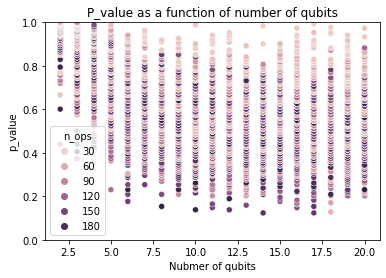

In [12]:
sns.scatterplot(
    data=df_all,
    y="p_value",
    x="n_qubits",
    hue="n_ops"
)
plt.ylim((0,1))
plt.xlabel("Nubmer of qubits")
plt.title("P_value as a function of number of qubits")

Text(0.5, 1.0, 'P_value as a function of number of gates')

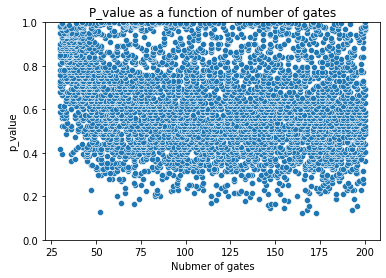

In [13]:
sns.scatterplot(
    data=df_all,
    y="p_value",
    x="n_ops"
)
plt.ylim((0,1))
plt.xlabel("Nubmer of gates")
plt.title("P_value as a function of number of gates")

## Close-up: is out p_value uniformly distributed?
https://stats.stackexchange.com/questions/10613/why-are-p-values-uniformly-distributed-under-the-null-hypothesis

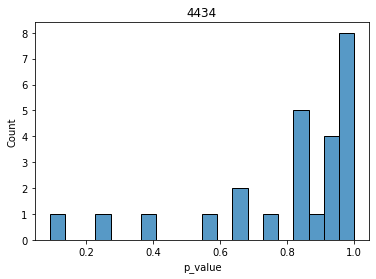

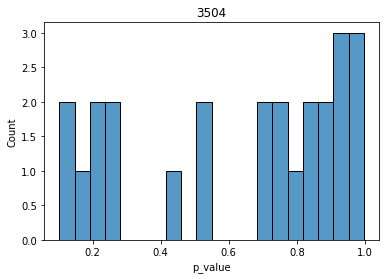

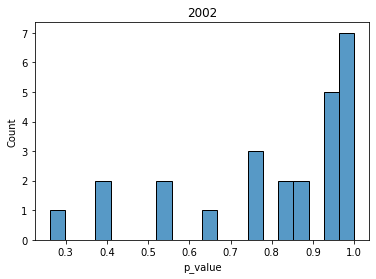

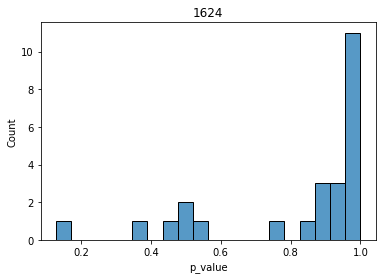

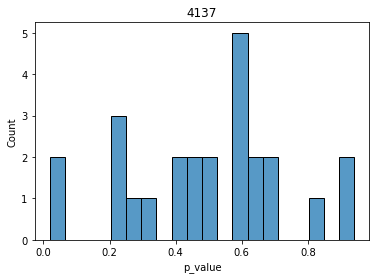

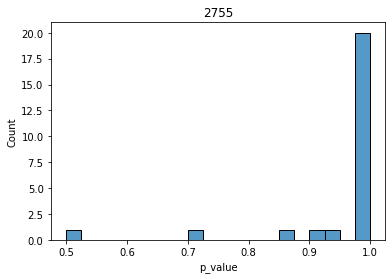

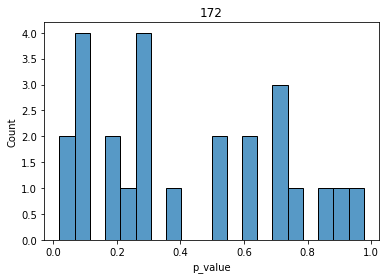

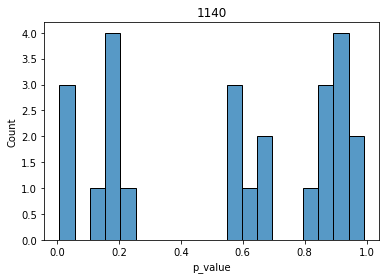

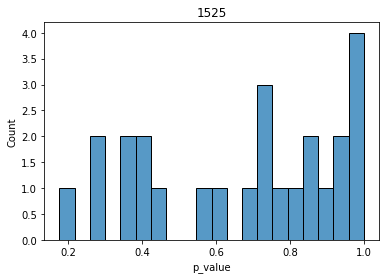

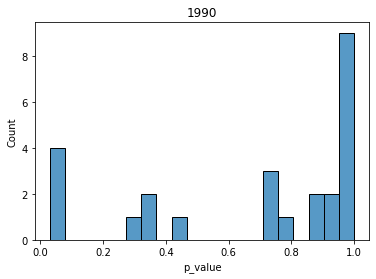

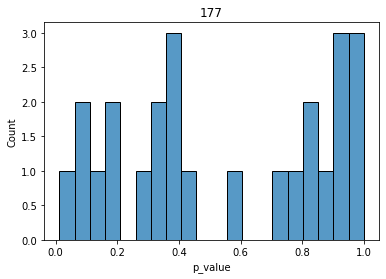

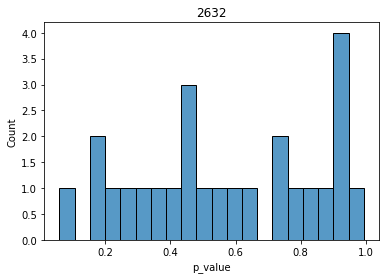

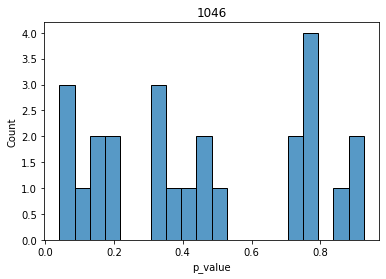

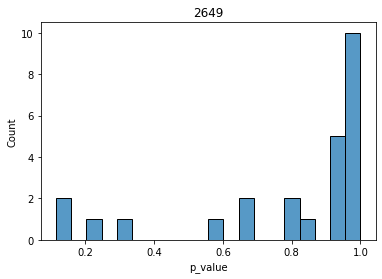

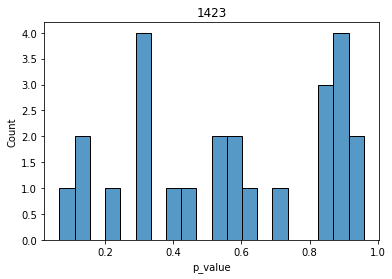

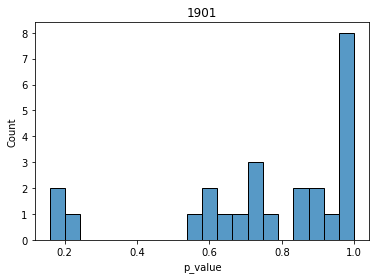

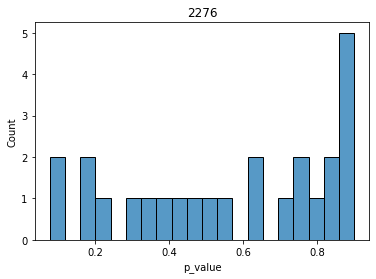

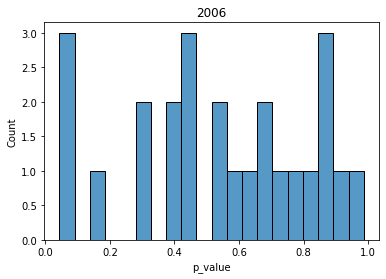

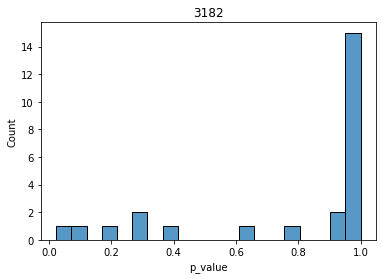

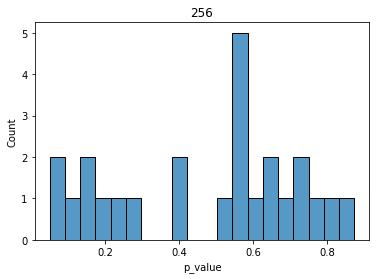

In [78]:
N_SAMPLES = 20
for i in np.random.choice(5000, N_SAMPLES):
    ID_TO_INSPECT = i
    df_single_circuit = df_detector_results[
        df_detector_results['circuit_id'] == str(ID_TO_INSPECT)
    ]
    sns.histplot(
        df_single_circuit,
        x="p_value",
        bins=20
    )
    plt.title(i)
    plt.show()


## Explore comparison with 40k shots 

In [5]:
compilers = config["comparisons"][0]["compilers"]
compilers_names = [e['name'] for e in compilers]
compilers_names

['qiskit', 'cirq']

In [6]:
all_records = []

for i_compiler in compilers_names:
    i_records = read_execution_folder(
        folder_with_execs=FOLDER_EXECUTIONS, 
        compiler_name=i_compiler)
    all_records.extend(i_records)

df_all = pd.DataFrame.from_records(all_records)
df_cirq = df_all[df_all["compiler_name"] == "cirq"].groupby(
    by=["compiler_name", "program_id"]).agg({"filepath": list}).reset_index()
df_qiskit = df_all[df_all["compiler_name"] == "qiskit"].groupby(
    by=["compiler_name", "program_id"]).agg({"filepath": list}).reset_index()


In [9]:
df_cirq.head()

,compiler_name,program_id,filepath
0,cirq,0,[../data/experiment_v07/cross_platform/executi...
1,cirq,1,[../data/experiment_v07/cross_platform/executi...
2,cirq,10,[../data/experiment_v07/cross_platform/executi...
3,cirq,100,[../data/experiment_v07/cross_platform/executi...
4,cirq,1000,[../data/experiment_v07/cross_platform/executi...


In [10]:
df_comparisons = pd.merge(
    left=df_cirq.drop(columns=['compiler_name']),
    right=df_qiskit.drop(columns=['compiler_name']), 
    on='program_id',
    suffixes=("_cirq", "_qiskit")
)
df_comparisons.head()

,program_id,filepath_cirq,filepath_qiskit
0,0,[../data/experiment_v07/cross_platform/executi...,[../data/experiment_v07/cross_platform/executi...
1,1,[../data/experiment_v07/cross_platform/executi...,[../data/experiment_v07/cross_platform/executi...
2,10,[../data/experiment_v07/cross_platform/executi...,[../data/experiment_v07/cross_platform/executi...
3,100,[../data/experiment_v07/cross_platform/executi...,[../data/experiment_v07/cross_platform/executi...
4,1000,[../data/experiment_v07/cross_platform/executi...,[../data/experiment_v07/cross_platform/executi...


In [11]:
example_list = df_cirq.iloc[0]['filepath']
example_list

['../data/experiment_v07/cross_platform/executions/cirq/0_4.json',
 '../data/experiment_v07/cross_platform/executions/cirq/0_3.json',
 '../data/experiment_v07/cross_platform/executions/cirq/0_0.json',
 '../data/experiment_v07/cross_platform/executions/cirq/0_1.json',
 '../data/experiment_v07/cross_platform/executions/cirq/0_2.json']

In [12]:
example_list = df_comparisons.iloc[0]['filepath_cirq']
example_list

['../data/experiment_v07/cross_platform/executions/cirq/0_4.json',
 '../data/experiment_v07/cross_platform/executions/cirq/0_3.json',
 '../data/experiment_v07/cross_platform/executions/cirq/0_0.json',
 '../data/experiment_v07/cross_platform/executions/cirq/0_1.json',
 '../data/experiment_v07/cross_platform/executions/cirq/0_2.json']

In [13]:
from utils import load_json
from functools import reduce


def join_two_executions(exec_a, exec_b):
    return {
        k: exec_a.get(k, 0) + exec_b.get(k, 0)
        for k in set(exec_a) | set(exec_b)
    }


def read_multiple_execution_as_one(filepath_executions):
    """
    Join all the dictionary result in one.
    
    x = {'both1': 1, 'both2': 2, 'only_x': 100}
    y = {'both1': 10, 'both2': 20, 'only_y': 200}

    print {k: x.get(k, 0) + y.get(k, 0) for k in set(x)}
    print {k: x.get(k, 0) + y.get(k, 0) for k in set(x) & set(y)}
    print {k: x.get(k, 0) + y.get(k, 0) for k in set(x) | set(y)}
    
    Results:

        {'both2': 22, 'only_x': 100, 'both1': 11}
        {'both2': 22, 'both1': 11}
        {'only_y': 200, 'both2': 22, 'both1': 11, 'only_x': 100}
    """
    all_dicts = [
        load_json(
            filename=os.path.basename(filepath), 
            folder=os.path.dirname(filepath))
        for filepath in filepath_executions
    ]
    return reduce(join_two_executions, all_dicts)
    
    
final_shots = read_multiple_execution_as_one(
    filepath_executions=example_list)

In [14]:
final_shots

{'11100': 2015,
 '11010': 19,
 '10010': 717,
 '11001': 5541,
 '00101': 938,
 '01001': 653,
 '11000': 151,
 '00001': 14788,
 '00010': 81,
 '01101': 70,
 '10111': 219,
 '00100': 7488,
 '10001': 199,
 '10100': 581,
 '01110': 245,
 '10110': 153,
 '10011': 106,
 '01000': 92,
 '11110': 383,
 '01011': 225,
 '11101': 374,
 '00110': 125,
 '01100': 1279,
 '00000': 517,
 '11111': 138,
 '10101': 78,
 '00011': 233,
 '00111': 145,
 '01111': 935,
 '10000': 66,
 '11011': 572,
 '01010': 1834}

In [15]:
from detectors import KS_Detector

In [16]:
detector = KS_Detector()

In [17]:
# iterate over all pairs

comparison_records = []

for i, row in df_comparisons.iterrows():
    print(i)
    i_record = {
        "program_id": row['program_id']
    }
    res_cirq = read_multiple_execution_as_one(row['filepath_cirq'])
    res_qiskit = read_multiple_execution_as_one(row['filepath_qiskit'])
    stat, p_value = detector.check(res_cirq, res_qiskit)
    i_record['p_value_40k'] = p_value
    i_record['stat_40k'] = stat
    comparison_records.append(i_record)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060


3500
3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699


In [18]:
df_40k_comparison = pd.DataFrame.from_records(comparison_records)

In [19]:
df_40k_comparison.head()

,program_id,p_value_40k,stat_40k
0,0,0.525171,0.005664
1,1,0.646778,0.005151
2,10,0.000537,0.014160
3,100,0.978727,0.003296
4,1000,0.413617,0.006177


In [14]:
PATH_40K = "../data/experiment_v07/cross_platform/predictions/40k_comparisons.csv"
#df_40k_comparison.to_csv(PATH_40K)
df_40k_comparison = pd.read_csv(PATH_40K)
df_40k_comparison["program_id"] = df_40k_comparison["program_id"].astype(str)

<AxesSubplot:xlabel='p_value_40k', ylabel='Count'>

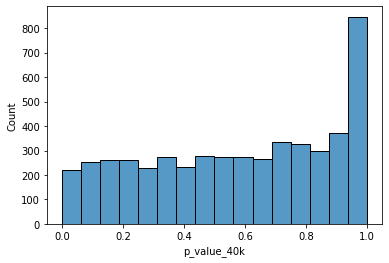

In [15]:
sns.histplot(
    df_40k_comparison,
    x="p_value_40k"
)

## 40kshots vs 25 times 8k

In [16]:
df_40_vs_25times = pd.merge(
    df_25times_8k_comparison,
    df_40k_comparison,
    on="program_id"
)
df_40_vs_25times.head()

,program_id,stat_median_25,p_value_median_25,Unnamed: 0,p_value_40k,stat_40k
0,1504,0.018433,0.123637,563,0.002906,0.012622
1,1530,0.018433,0.123637,592,0.002833,0.012646
2,3131,0.018311,0.128261,2371,0.031501,0.010059
3,40,0.018066,0.137932,3335,0.015444,0.010889
4,4433,0.018066,0.137932,3817,0.002084,0.012939


In [17]:
df_40_vs_25times_w_info = pd.merge(
    df_40_vs_25times, 
    df_info.rename(columns={"circuit_id": "program_id"}), 
    on="program_id")
df_40_vs_25times_w_info.head()

,program_id,stat_median_25,p_value_median_25,Unnamed: 0,p_value_40k,stat_40k,n_qubits,n_ops,gate_set,strategy_program_generation,benchmark_name
0,1504,0.018433,0.123637,563,0.002906,0.012622,17,165,"{'cx': 3, 'rx': 1, 'ry': 1, 'rz': 1, 'p': 1}",WeightedRandomCircuitGenerator,cross_platform
1,1530,0.018433,0.123637,592,0.002833,0.012646,14,173,"{'cx': 3, 'rx': 1, 'ry': 1, 'rz': 1, 'p': 1}",WeightedRandomCircuitGenerator,cross_platform
2,3131,0.018311,0.128261,2371,0.031501,0.010059,18,52,"{'cx': 3, 'rx': 1, 'ry': 1, 'rz': 1, 'p': 1}",WeightedRandomCircuitGenerator,cross_platform
3,40,0.018066,0.137932,3335,0.015444,0.010889,10,193,"{'cx': 3, 'rx': 1, 'ry': 1, 'rz': 1, 'p': 1}",WeightedRandomCircuitGenerator,cross_platform
4,4433,0.018066,0.137932,3817,0.002084,0.012939,12,168,"{'cx': 3, 'rx': 1, 'ry': 1, 'rz': 1, 'p': 1}",WeightedRandomCircuitGenerator,cross_platform


In [40]:
print(len(df_40_vs_25times_w_info))

5000


(-0.1, 1.1)

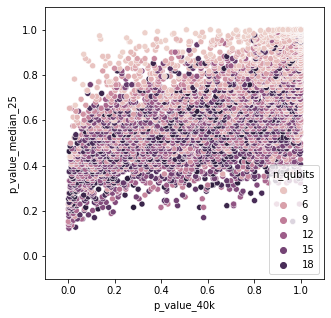

In [41]:
fig, ax = plt.subplots(figsize=(5,5))
sns.scatterplot(
    data=df_40_vs_25times_w_info,
    x="p_value_40k",
    y="p_value_median_25",
    hue="n_qubits",
    ax=ax
)
plt.xlim((-.1,1.1))
plt.ylim((-.1,1.1))

(-0.1, 1.1)

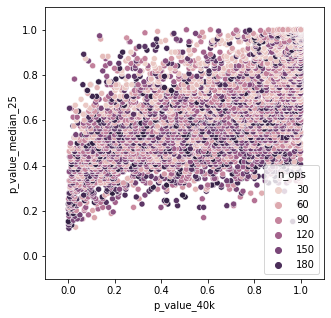

In [42]:
fig, ax = plt.subplots(figsize=(5,5))
sns.scatterplot(
    data=df_40_vs_25times_w_info,
    x="p_value_40k",
    y="p_value_median_25",
    hue="n_ops",
    ax=ax
)
plt.xlim((-.1,1.1))
plt.ylim((-.1,1.1))

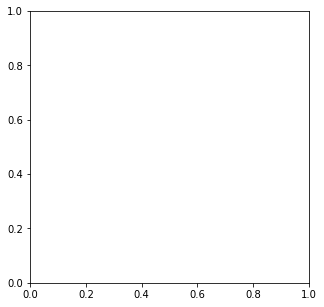

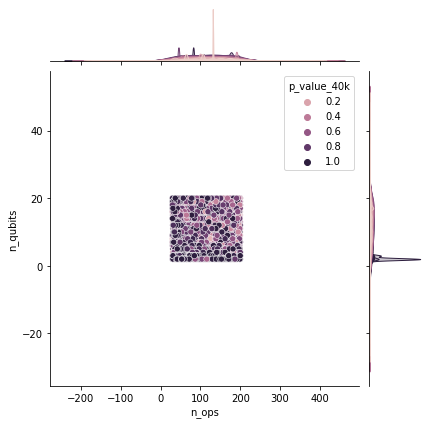

In [73]:
fig, ax = plt.subplots(figsize=(5,5))
sns.jointplot(
    data=df_40_vs_25times_w_info,
    x="n_ops",
    y="n_qubits",
    hue="p_value_40k",
    ax=ax
)

## Most Severe Cases

In [18]:
COLUMNS_TO_INSPECT = ["program_id", "p_value_40k", "p_value_median_25", "n_ops", "n_qubits"]

In [24]:
df_inspection = df_40_vs_25times_w_info[COLUMNS_TO_INSPECT]
# for p_value_median_25
df_inspection.sort_values(by=["p_value_median_25"]).head(10)

,program_id,p_value_40k,p_value_median_25,n_ops,n_qubits
0,1504,0.002906,0.123637,165,17
1,1530,0.002833,0.123637,173,14
2,3131,0.031501,0.128261,52,18
3,40,0.015444,0.137932,193,10
4,4433,0.002084,0.137932,168,12
5,4303,0.006828,0.148186,147,16
6,2298,0.002495,0.148186,155,11
7,10,0.000537,0.153537,196,8
8,1804,0.965655,0.153537,169,17
9,1579,0.022683,0.159043,146,13


In [35]:
df_inspection = df_40_vs_25times_w_info[COLUMNS_TO_INSPECT]
# for p_value_40k
df_inspection = df_inspection[df_inspection["p_value_40k"] < .01]
df_inspection.sort_values(by="n_ops").head(20)

,program_id,p_value_40k,p_value_median_25,n_ops,n_qubits
1320,126,0.008230,0.486951,55,19
187,1953,0.009890,0.305028,58,15
1142,2619,0.004326,0.462972,62,20
38,49,0.004326,0.215928,66,16
284,76,0.006828,0.333291,71,13
184,515,0.007326,0.305028,91,8
82,1335,0.001782,0.253636,103,19
66,4009,0.005129,0.230465,110,5
970,2086,0.009026,0.439613,112,2
268,3507,0.004433,0.333291,124,7


In [63]:
df_inspection = df_40_vs_25times_w_info[COLUMNS_TO_INSPECT]
n_divergent_cases = len(df_inspection[df_inspection["p_value_40k"] < 0.01])
print(f"With the comparison on the 40k shots we have {n_divergent_cases} divergent cases.")

With the comparison on the 40k shots we have 33 divergent cases.


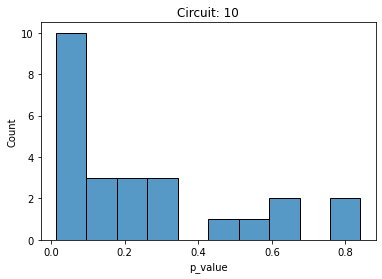

In [47]:
ID_TO_INSPECT = 10
df_single_circuit = df_detector_results[
    df_detector_results['circuit_id'] == str(ID_TO_INSPECT)
]
sns.histplot(
    df_single_circuit,
    x="p_value",
    bins=10
)
plt.title(f"Circuit: {ID_TO_INSPECT}")
plt.show()

In [53]:
df = df_40_vs_25times_w_info[COLUMNS_TO_INSPECT]
df[df["program_id"] == "10"].head()

,program_id,p_value_40k,p_value_median_25,n_ops,n_qubits
7,10,0.000537,0.153537,196,8
